<a href="https://colab.research.google.com/github/mateuspadua/machine-learning/blob/master/wine_predict/wine_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_16721_22034_wine_dataset.csv to datasets_16721_22034_wine_dataset.csv


In [ ]:
# Importando as bibliotecas
import pandas as pd # biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np # biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt # biblioteca utilizada para construir os gráficos
import seaborn as sns
df = pd.read_csv("datasets_16721_22034_wine_dataset.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
print(f"número de instancias {df.shape[0]}")
print(f"número de atributos {df.shape[1]}")

número de instancias 6497
número de atributos 13


In [ ]:
# quantidade de cada vinho no dataframe
df["style"].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [ ]:
#Quantidade de instâncias com valor alcolico igual 9.8
len(df[df['alcohol'] == 9.8])

214

In [ ]:
df["style"] = df["style"].apply(lambda v: 0 if v == "red" else 1)
# df.apply(lambda x: [1, 2], axis=0)

In [ ]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
df.iloc[:,:-1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# criando os conjuntos de dados de treino e teste
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)

# encontrando acurácia do modelo
accuracy = modelo.score(x_test, y_test)
print(f"Acurácia do modelo {accuracy}")

Acurácia do modelo 0.9974358974358974


In [ ]:
x_test[400:405]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
878,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
2957,6.8,0.350,0.32,2.4,0.048,35.0,103.0,0.99110,3.28,0.46,12.0,8
4164,7.3,0.370,0.16,14.9,0.048,59.0,240.0,0.99902,3.13,0.45,8.9,5
4768,5.7,0.160,0.26,6.3,0.043,28.0,113.0,0.99360,3.06,0.58,9.9,6
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [ ]:
y_test[400:405]

878     0
2957    1
4164    1
4768    1
555     0
Name: style, dtype: int64

In [ ]:
# prevendo o tipo de vinho a partir de 5 valores de testes.
previsoes = modelo.predict(x_test[400:405])
 
print("Os valores inferidos foram: {}".format(previsoes))

Os valores inferidos foram: [0 1 1 1 0]


In [ ]:
#Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"
df[['alcohol','quality']].corr()

,alcohol,quality
alcohol,1.000000,0.444319
quality,0.444319,1.000000


In [ ]:
df2 = df.copy()

In [ ]:
# encontrando a correlação de Person entre as variáveis alcohol quality e style
df_corr = df[['alcohol', 'quality', 'style']]
corr = pd.DataFrame(df_corr).corr()
corr

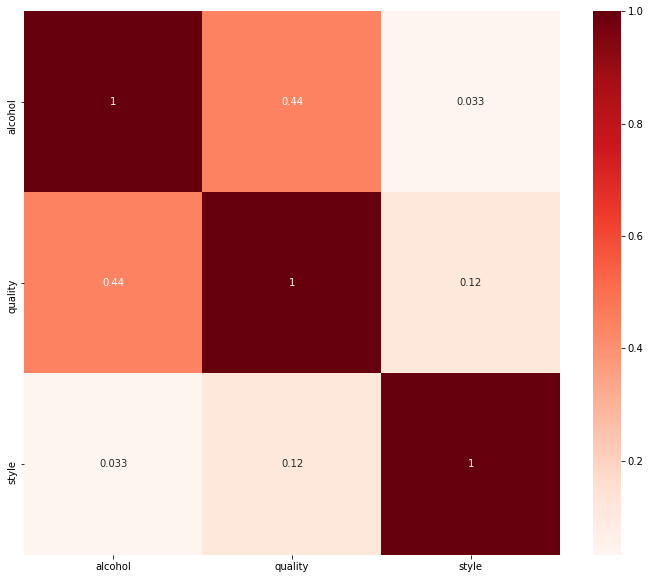

In [ ]:
# imprimi de forma gráfica a correlação de Person
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# encontrando a correlação de Person entre as variáveis alcohol quality e style
corr = pd.DataFrame(df).corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


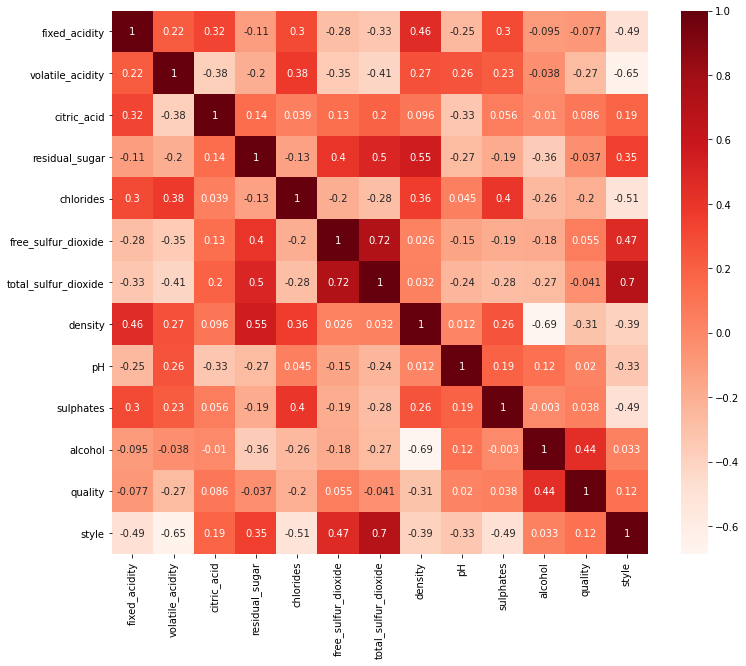

In [ ]:
# imprimi de forma gráfica a correlação de Person
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

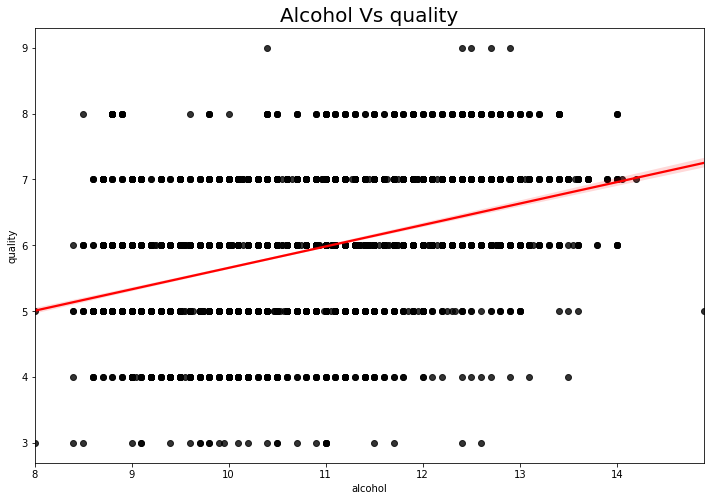

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x='alcohol', y='quality', data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.title("Alcohol Vs quality", fontsize = 20)
plt.show()

In [ ]:
# repare que quando a qualidade é igual a 9 temos apenas 5 tipos de alcohol, dá para ver isso no gráfico acima
df[["alcohol", "quality"]][df["quality"] == 9]

,alcohol,quality
2373,10.4,9
2419,12.4,9
2426,12.5,9
2475,12.7,9
3204,12.9,9
